# 颜色空间的转换-RGB和YUV

## 1. RGB模型与YUV模型

### 1.1 RGB模型

我们知道物理三基色分别是红(Red)、绿(Green)、蓝(Blue)。现代的显示器技术就是通过组合不同强度的红绿蓝三原色，来达成几乎任何一种可见光的颜色。在图像储存中，通过记录每个像素的红绿蓝强度，来记录图像的方法，称为RGB模型 (RGB Model)。常见的图片格式中，PNG和BMP这两种就是基于RGB模型的。

### 1.2 YUV模型

除了RGB模型外，还有一种广泛采用的模型，称为YUV模型，又被称为亮度-色度模型（Luma-ChromaModel）。它是通过数学转换，将RGB三通道转换为一个代表亮度的通道(Y,又称为Luma)，和两个代表色度的通道(UV，并称为Chroma)来记录图像的模型。

## 2. RGB与YUV之间的转换

### 2.1 为何要进行RGB与YUV之间的转换

我们实际传输的信号为YUV信号，而不是RGB信号，那么为什么要进行RGB与YUV之间的转换呢，这主要是考虑了以下几个方面：

a.为了与黑白电视系统兼容，因为在黑白电视系统中只需要传输亮度信号Y即可，而不需要传输色度信号；

b.转换成YUV信号可以节省信号的带宽；

c.恒定亮度原理告诉我们在传输过程中，若色差信号受到干扰，在最后还原三基色时，不会影响亮度；

d.混合高频原理告诉我们利用人眼对彩色细节分辨力较低的这一特点，在图像的高频部分中我们只需要传输亮度信号，而不必传送色度信号。

此外，现在基本所有的显示器都是通过组合RGB三原色来重现图像的，所以在显示端也必须将YUV信号转换成RGB信号，这就是我们要进行RGB信号与YUV信号相互转换的原因。

### 2.2 转换过程

#### 2.2.1 RGB2YUV

在做RGB信号到YUV信号的转换时，一般是先转换到YUV444格式（参见色度信号取样格式），然后再将UV信号的分辨率降低，变成我们所需的格式。

#### 2.2.2 YUV2RGB

在播放视频或显示图像的时候，我们需要将YUV信号转换为RGB信号。这个步骤称为渲染（Rendering）。

在做YUV到RGB的转换时，首先需要将缩水的UV信号的分辨率拉升到与Y信号相同的分辨率，然后再转换到RGB信号。

## 3. 转换公式

### 3.1 基本转换公式

下面是RGB与YUV之间的转换公式：

![](doc_imgs/34.png)


一般这一步骤可通过编码矩阵来实现，写成矩阵的形式为：
![](doc_imgs/35.png)
上图中的两个矩阵即为编码矩阵。

### 3.2 各种RGB转YUV的转换公式

#### 3.2.1 模拟YUV->模拟RGB

#### 3.2.1.1 BT601(标清国际定义)

转换公式如下：
![](doc_imgs/36.png)

#### 3.2.1.2 BT709(高清)

转换公式如下：
![](doc_imgs/37.png)

### 3.2.2 数字YUV->数字RGB

#### 3.2.2.1 BT601

转换公式如下：
![](doc_imgs/38.png)

#### 3.2.2.2 BT709

转换公式如下：
![](doc_imgs/39.png)

模拟RGB转YUV的推导公式：
![](doc_imgs/40.png)
数字RGB转YUV的推导公式：
![](doc_imgs/41.png)
其中：
![](doc_imgs/42.png)

## 4. 代码实现

In [71]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data
import pandas as pd
from pandas import DataFrame
import math
import scipy
from scipy import linalg

In [72]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [76]:
# 基于基本公式实现
yuv_from_rgb = np.array([[ 0.299     ,  0.587     ,  0.114      ],
                         [-0.14714119, -0.28886916,  0.43601035 ],
                         [ 0.61497538, -0.51496512, -0.10001026 ]])

rgb_from_yuv = linalg.inv(yuv_from_rgb)
def rgb2yuv(img):
#     rgb = np.float32(src)
#     yuv = np.zeros_like(rgb)
    
#     R = rgb[:,:,0]
#     G = rgb[:,:,1]
#     B = rgb[:,:,2]
    
#     yuv[:,:,0] = 0.299 * R + 0.587 * G + 0.114 * B
#     yuv[:,:,1] = -0.147 * R - 0.289 * G - 0.439 * B
#     yuv[:,:,2] = 0.615 * R - 0.515 * G - 0.100 * B
    src = np.float64(img)
    arr = np.reshape(src,(src.shape[0] * src.shape[1],3))
    yuv = np.dot(arr,yuv_from_rgb.T.copy())
    yuv = np.reshape(yuv,src.shape)
    return yuv 

def yuv2rgb(img_yuv):
#     Y = yuv[:,:,0]
#     U = yuv[:,:,1]
#     V = yuv[:,:,2]
    
#     RGB = np.zeros_like(yuv)
#     RGB[:,:,0] = Y + 1.140 * V
#     RGB[:,:,1] = Y - 0.395 * U - 0.581 * V
#     RGB[:,:,2] = Y + 2.032 * U
    src = np.float64(img_yuv)
    arr = np.reshape(yuv,(src.shape[0]*src.shape[1],src.shape[2]))
    rgb = np.dot(arr,rgb_from_yuv.T.copy())
    rgb = np.reshape(rgb,src.shape)
    
    return cv2.convertScaleAbs(rgb)
    

Text(0.5,1,'RGB->YUV')

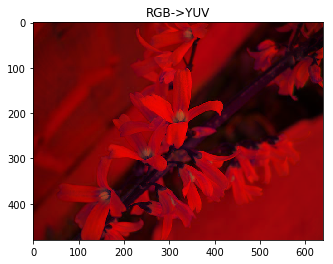

In [77]:
yuv = rgb2yuv(src)
plt.imshow(cv2.convertScaleAbs(yuv))
plt.title('RGB->YUV')

Text(0.5,1,'RGB->YUV')

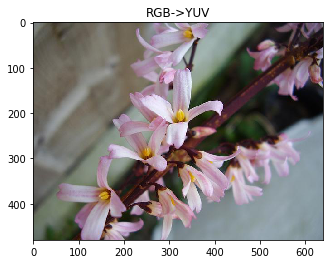

In [78]:
rgb = yuv2rgb(yuv)
plt.imshow(rgb)
plt.title('RGB->YUV')

调用OpenCV实现

Text(0.5,1,'OpenCV:RGB->YUV')

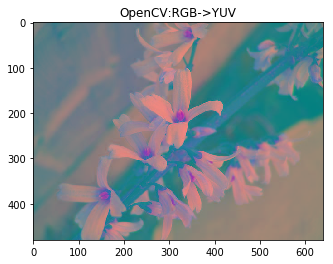

In [66]:
yuv = cv2.cvtColor(src,cv2.COLOR_RGB2YUV)
plt.imshow(yuv)
plt.title('OpenCV:RGB->YUV')

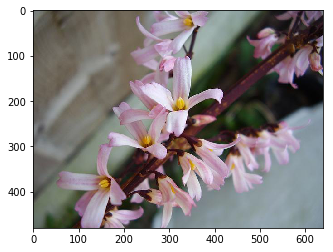

In [69]:
rgb = cv2.cvtColor(yuv,cv2.COLOR_YUV2RGB)
plt.imshow(rgb)

参考：

[1].https://blog.csdn.net/wo6694458/article/details/61640647

[2].https://www.cnblogs.com/zhengjianhong/p/7872459.html